# StellarGraph Implementation Using Manual Dataset

## Loading data into StellarGraph from Pandas

[The StellarGraph library](https://github.com/stellargraph/stellargraph) supports loading graph information from Pandas. [Pandas](https://pandas.pydata.org) is a library for working with data frames.

The StellarGraph library supports many deep machine learning (ML) algorithms on [graphs](https://en.wikipedia.org/wiki/Graph_%28discrete_mathematics%29). A graph consists of a set of *nodes* connected by *edges*, potentially with information associated with each node and edge. Any task using the StellarGraph library needs data to be loaded into an instance of the `StellarGraph` class. This class stores the graph structure (the nodes and the edges between them), as well as information about them:

- *node types* and *edge types*: a class or category to which the nodes and edges belong, dictating what features are available on a node, and potentially signifying some sort of semantic meaning (this is different to machine learning label for a node)
- *node features* and *edge features*: vectors of numbers associated with each node or edge
- *edge weights*: a number associated with each edge

All of these are optional, because they have sensible defaults if they're not relevant to the task at hand.

> StellarGraph supports loading data from many sources with all sorts of data preprocessing, via [Pandas](https://pandas.pydata.org) DataFrames, [NumPy](https://www.numpy.org) arrays, [Neo4j](https://neo4j.com) and [NetworkX](https://networkx.github.io) graphs. See [all loading demos](README.md) for more details.

The [documentation](https://stellargraph.readthedocs.io/en/stable/api.html#stellargraph.StellarGraph) for the `StellarGraph` class includes a compressed reminder of everything discussed in this file, as well as explanations of all of the parameters.

The `StellarGraph` class is available at the top level of the `stellargraph` library:

In [1]:
from stellargraph import StellarGraph

/Users/kareemrahman/.pyenv/versions/3.6.15/lib/python3.6/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


## DBLP Dataset

This dataset represents an academic network in computer science. In this data set, authors are labeled with one of four research areas: “database”, “data mining”,“machine learning” and “information retrieval”.

**dblp.edgelist**
This file contains all edges between different node types.

**dblp_labels.txt**
This file contains the assignment of one of the four labels (i.e., research areas) to each author. This will probably be useful later on as ground truth for comparison purposes.

### Step 1: Loading from .edgelist Files in Pandas Dataframes

Pandas DataFrames are tables of data that can be created from [many input sources](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html), such as [CSV files](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and [SQL databases](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html). StellarGraph builds on this power by allowing construction from these DataFrames.

The data is formatted one entry per line as follows (tab separated, "\t")

In [9]:
import pandas as pd

#Set correct directory paths to files
edgelist_filename = '../DBLP/dblp.edgelist'

# Read the file and create Node Dataframes
edgelist_df = pd.read_csv(edgelist_filename, sep=' ', names=['source', 'target'])

display(edgelist_df)

,source,target
0,p0,a1
1,p0,a2
2,p0,a3
3,p0,a4
4,p0,a5
...,...,...
51372,p10169,p8094
51373,p10169,p7974
51374,p10169,p5852
51375,p10169,p10113


In [10]:
# Extract unique node IDs for each type
def extract_nodes(df, prefix):
    nodes = pd.concat([
        df['source'][df['source'].str.startswith(prefix)],
        df['target'][df['target'].str.startswith(prefix)]
    ]).unique()
    return pd.DataFrame(nodes, columns=['node_id']).set_index('node_id')

# Extract node DataFrames for each type
authors_df = extract_nodes(edgelist_df, 'a')
topics_df = extract_nodes(edgelist_df, 't')
venues_df = extract_nodes(edgelist_df, 'v')
papers_df = extract_nodes(edgelist_df, 'p')

In [11]:
# Function to create edge DataFrame for a specific interaction, ensuring source and target prefixes
def create_edge_df(df, source_prefix, target_prefix):
    # Filter rows based on prefixes
    filtered_edges = df[(df['source'].str.startswith(source_prefix)) & (df['target'].str.startswith(target_prefix))]
    return filtered_edges

# Create edge DataFrames for each interaction type
paper_author_df = create_edge_df(edgelist_df, 'p', 'a')
paper_topic_df = create_edge_df(edgelist_df, 'p', 't')
paper_venue_df = create_edge_df(edgelist_df, 'p', 'v')
paper_paper_df = create_edge_df(edgelist_df, 'p', 'p')

In [12]:
# Display the first few rows
print(authors_df)
print("\n")
print(topics_df)
print("\n")
print(venues_df)
print("\n")
print(papers_df)
print("\n")
print(paper_author_df)
print("\n")
print(paper_topic_df)
print("\n")
print(paper_venue_df)
print("\n")
print(paper_paper_df)

Empty DataFrame
Columns: []
Index: [a1, a2, a3, a4, a5, a7, a8, a9, a10, a12, a13, a14, a15, a16, a17, a18, a20, a21, a22, a24, a25, a26, a27, a28, a30, a31, a33, a34, a36, a37, a39, a40, a42, a43, a44, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60, a61, a62, a63, a64, a65, a67, a68, a69, a70, a71, a73, a75, a76, a78, a79, a81, a82, a84, a87, a88, a91, a92, a93, a95, a97, a98, a100, a102, a103, a104, a106, a107, a108, a109, a111, a112, a114, a116, a117, a118, a120, a121, a123, a124, a125, a127, a128, a130, a131, a133, ...]

[5915 rows x 0 columns]


Empty DataFrame
Columns: []
Index: [t10191, t10192, t10193, t10194, t10195, t10196, t10197, t10198, t10199, t10200, t10201, t10202, t10203, t10204, t10205, t10206, t10207, t10208, t10209, t10210, t10211, t10212, t10213, t10214, t10215, t10216, t10217, t10218, t10219, t10220, t10221, t10222, t10223, t10224, t10225, t10226, t10227, t10228, t10229, t10230, t10231, t10232, t10233, t10234, t10235, t10236, t10237, t102

In [13]:
processed_authors_df = authors_df.copy()
processed_topics_df = topics_df.copy()
processed_venues_df = venues_df.copy()
processed_papers_df = papers_df.copy()
processed_paper_author_df = paper_author_df.copy()
processed_paper_topic_df = paper_topic_df.copy()
processed_paper_venue_df = paper_venue_df.copy()
processed_paper_paper_df = paper_paper_df.copy()

## Loading Pandas DFs into StellarGraph

### Removing Duplicates in Node DFs + Check for Uniqueness

Any duplications in node indexes within the node DFs is problematic and must be resolved.

In [14]:
#Convert indices to Series and then concatenate
all_ids = pd.concat([processed_authors_df.index.to_series(), 
                     processed_topics_df.index.to_series(), 
                     processed_venues_df.index.to_series(),
                     processed_papers_df.index.to_series()])

#Check for duplicate IDs across all node types
duplicated_ids = all_ids[all_ids.duplicated()]
if not duplicated_ids.empty:
    print("There are duplicate IDs across node types.")
    print("Duplicate IDs:", duplicated_ids.unique())
else:
    print("No duplicate IDs across node types.")

#Check if IDs contain unique values after string concatenation 
print("All concatenated IDs are unique:", all_ids.is_unique)

No duplicate IDs across node types.
All concatenated IDs are unique: True


### Removing Duplicates in Edge DFs

Any two edges that are identical in the edge DFs must be resolved. We drop the duplicates after this step.

In [15]:
# Function to check for duplicate edges in an edge DataFrame
def check_for_duplicates(edge_df, relationship_name):
    if edge_df.duplicated().any():
        print(f"There are duplicate edges in '{relationship_name}' relationship.")
        duplicate_edges = edge_df[edge_df.duplicated(keep=False)]
        print(f"Duplicate edges in '{relationship_name}' relationship:")
        print(duplicate_edges)
    else:
        print(f"No duplicate edges in '{relationship_name}' relationship.")

# Check for duplicate edges in paper-author relationships
check_for_duplicates(processed_paper_author_df, "paper-author")

# Check for duplicate edges in paper-topic relationships
check_for_duplicates(processed_paper_topic_df, "paper-topic")

# Check for duplicate edges in paper-venue relationships
check_for_duplicates(processed_paper_venue_df, "paper-venue")

# Check for duplicate edges in paper-paper relationships (citations)
check_for_duplicates(processed_paper_paper_df, "paper-paper")

No duplicate edges in 'paper-author' relationship.
No duplicate edges in 'paper-topic' relationship.
No duplicate edges in 'paper-venue' relationship.
No duplicate edges in 'paper-paper' relationship.


### Checking for Unconnected Nodes

In order for the random walks to cover ALL nodes and generate embeddings for each one, only nodes that are connected to others as part of the graph can be considered. We check for unconnected nodes by inspecting the edge dataframes and cross-checking with the node dataframes. 

If any index is in the node DF BUT NOT in ANY edge DF, THEN we drop it. 

In [16]:
# Check for isolated authors
isolated_authors = processed_authors_df.index[
    ~processed_authors_df.index.isin(processed_paper_author_df['target'])
]
if not isolated_authors.empty:
    print("Isolated author nodes:")
    print(isolated_authors)
else:
    print("No isolated author nodes.")

# Check for isolated topics
isolated_topics = processed_topics_df.index[
    ~processed_topics_df.index.isin(processed_paper_topic_df['target'])
]
if not isolated_topics.empty:
    print("Isolated topic nodes:")
    print(isolated_topics)
else:
    print("No isolated topic nodes.")

# Check for isolated venues
isolated_venues = processed_venues_df.index[
    ~processed_venues_df.index.isin(processed_paper_venue_df['target'])
]
if not isolated_venues.empty:
    print("Isolated venue nodes:")
    print(isolated_venues)
else:
    print("No isolated venue nodes.")

# Check for isolated papers
isolated_papers = processed_papers_df.index[
    ~processed_papers_df.index.isin(processed_paper_author_df['source']) &
    ~processed_papers_df.index.isin(processed_paper_topic_df['source']) &
    ~processed_papers_df.index.isin(processed_paper_venue_df['source']) &
    ~processed_papers_df.index.isin(processed_paper_paper_df['source']) &
    ~processed_papers_df.index.isin(processed_paper_paper_df['target'])
]
if not isolated_papers.empty:
    print("Isolated paper nodes:")
    print(isolated_papers)
else:
    print("No isolated paper nodes.")


No isolated author nodes.
No isolated topic nodes.
No isolated venue nodes.
No isolated paper nodes.


### Deleting Unconnected Nodes from Node DFs

If a node isn't connected to any other node through edges, it doesn't contribute to the relational information captured by your graph. Removing such nodes can streamline your data and potentially speed up computations, especially for graph algorithms that rely on edge connections. Moreover, since these nodes do not participate in any walks, they wouldn't be included in your Word2Vec training corpus anyway, making their removal from the node lists reasonable.

If any index is in the node DF BUT NOT in ANY edge DF, THEN we drop it. 

### Checking for Invalid Edges

Also, any edges that refer to nodes that are NOT in the node dataframe are considered invalid. These must also be dropped so that we can use StellarGraph.

In [17]:
# Check for invalid edge references in paper-author relationship
invalid_edges_paper_author = processed_paper_author_df[
    ~processed_paper_author_df['source'].isin(processed_papers_df.index) |
    ~processed_paper_author_df['target'].isin(processed_authors_df.index)
]
if not invalid_edges_paper_author.empty:
    print("Invalid edges in 'paper-author' relationship:")
    print(invalid_edges_paper_author)
else:
    print("No invalid edges in 'paper-author' relationship.")

# Check for invalid edge references in paper-topic relationship
invalid_edges_paper_topic = processed_paper_topic_df[
    ~processed_paper_topic_df['source'].isin(processed_papers_df.index) |
    ~processed_paper_topic_df['target'].isin(processed_topics_df.index)
]
if not invalid_edges_paper_topic.empty:
    print("Invalid edges in 'paper-topic' relationship:")
    print(invalid_edges_paper_topic)
else:
    print("No invalid edges in 'paper-topic' relationship.")

# Check for invalid edge references in paper-venue relationship
invalid_edges_paper_venue = processed_paper_venue_df[
    ~processed_paper_venue_df['source'].isin(processed_papers_df.index) |
    ~processed_paper_venue_df['target'].isin(processed_venues_df.index)
]
if not invalid_edges_paper_venue.empty:
    print("Invalid edges in 'paper-venue' relationship:")
    print(invalid_edges_paper_venue)
else:
    print("No invalid edges in 'paper-venue' relationship.")

# Check for invalid edge references in paper-paper (citation) relationship
invalid_edges_paper_paper = processed_paper_paper_df[
    ~processed_paper_paper_df['source'].isin(processed_papers_df.index) |
    ~processed_paper_paper_df['target'].isin(processed_papers_df.index)
]
if not invalid_edges_paper_paper.empty:
    print("Invalid edges in 'paper-paper' relationship:")
    print(invalid_edges_paper_paper)
else:
    print("No invalid edges in 'paper-paper' relationship.")

No invalid edges in 'paper-author' relationship.
No invalid edges in 'paper-topic' relationship.
No invalid edges in 'paper-venue' relationship.
No invalid edges in 'paper-paper' relationship.


### Final Check for StellarGraph Input

In [18]:
#Check if data types are all matching for suitable StellarGraph input
# Print data types of indices of node DataFrames
print("Data type of authors_df index:", authors_df.index.dtype)
print("Data type of topics_df index:", topics_df.index.dtype)
print("Data type of venues_df index:", venues_df.index.dtype)
print("Data type of papers_df index:", papers_df.index.dtype)

# Review each node DataFrame briefly
print("\nAuthors DF:")
print(authors_df.head())
print("\nTopics DF:")
print(topics_df.head())
print("\nVenues DF:")
print(venues_df.head())
print("\nPapers DF:")
print(papers_df.head())


# Print data types of 'source' and 'target' in edge DataFrames
print("Data type of source in paper_author_df:", processed_paper_author_df['source'].dtype)
print("Data type of target in paper_author_df:", processed_paper_author_df['target'].dtype)
print("Data type of source in paper_topic_df:", processed_paper_topic_df['source'].dtype)
print("Data type of target in paper_topic_df:", processed_paper_topic_df['target'].dtype)
print("Data type of source in paper_venue_df:", processed_paper_venue_df['source'].dtype)
print("Data type of target in paper_venue_df:", processed_paper_venue_df['target'].dtype)
print("Data type of source in paper_paper_df:", processed_paper_paper_df['source'].dtype)
print("Data type of target in paper_paper_df:", processed_paper_paper_df['target'].dtype)

# Review each edge DataFrame briefly
print("\nPaper-Author DF:")
print(processed_paper_author_df.head())
print("\nPaper-Topic DF:")
print(processed_paper_topic_df.head())
print("\nPaper-Venue DF:")
print(processed_paper_venue_df.head())
print("\nPaper-Paper DF:")
print(processed_paper_paper_df.head())

Data type of authors_df index: object
Data type of topics_df index: object
Data type of venues_df index: object
Data type of papers_df index: object

Authors DF:
Empty DataFrame
Columns: []
Index: [a1, a2, a3, a4, a5]

Topics DF:
Empty DataFrame
Columns: []
Index: [t10191, t10192, t10193, t10194, t10195]

Venues DF:
Empty DataFrame
Columns: []
Index: [v10173, v10174, v10175, v10176, v10177]

Papers DF:
Empty DataFrame
Columns: []
Index: [p0, p6, p11, p19, p23]
Data type of source in paper_author_df: object
Data type of target in paper_author_df: object
Data type of source in paper_topic_df: object
Data type of target in paper_topic_df: object
Data type of source in paper_venue_df: object
Data type of target in paper_venue_df: object
Data type of source in paper_paper_df: object
Data type of target in paper_paper_df: object

Paper-Author DF:
  source target
0     p0     a1
1     p0     a2
2     p0     a3
3     p0     a4
4     p0     a5

Paper-Topic DF:
   source  target
6      p0  t1019

We can modify the approach to create unique numerical IDs across all edge DataFrames. To do this, you can concatenate all edge DataFrames, create a unique numerical ID, and then split them back. This way, each edge in the entire dataset will have a unique ID.

This approach ensures that each edge across all your relationships has a unique, numerical identifier.

In [19]:
# Concatenate all edge DataFrames with an additional column for edge type
all_edges = pd.concat([
    processed_paper_author_df.assign(edge_type="paper-author"),
    processed_paper_topic_df.assign(edge_type="paper-topic"),
    processed_paper_venue_df.assign(edge_type="paper-venue"),
    processed_paper_paper_df.assign(edge_type="paper-paper")
]).reset_index(drop=True)

# Add unique numerical edge IDs
all_edges['edge_id'] = range(all_edges.shape[0])

# Split the DataFrames back
processed_paper_author_df = all_edges[all_edges['edge_type'] == "paper-author"].drop(['edge_type', 'edge_id'], axis=1)
processed_paper_topic_df = all_edges[all_edges['edge_type'] == "paper-topic"].drop(['edge_type', 'edge_id'], axis=1)
processed_paper_venue_df = all_edges[all_edges['edge_type'] == "paper-venue"].drop(['edge_type', 'edge_id'], axis=1)
processed_paper_paper_df = all_edges[all_edges['edge_type'] == "paper-paper"].drop(['edge_type', 'edge_id'], axis=1)

### Passing DFs into StellarGraph Function

In [20]:
# Create a dictionary for node types and corresponding DataFrames
nodes = {
    'author': authors_df,
    'topic': topics_df,
    'venue': venues_df,
    'paper': papers_df
}

# Create a dictionary for edge types and corresponding DataFrames
edges = {
    ('paper', 'author'): processed_paper_author_df,
    ('paper', 'topic'): processed_paper_topic_df,
    ('paper', 'venue'): processed_paper_venue_df,
    ('paper', 'paper'): processed_paper_paper_df
}

# Create the StellarGraph object
g = StellarGraph(nodes, edges)

print(
    "Number of nodes {} and number of edges {} in graph.".format(
        g.number_of_nodes(), g.number_of_edges()
    )
)

print("\n")

print("Below is an overview of the StellarGraph structure:")
print(g.info())

Number of nodes 15649 and number of edges 51377 in graph.


Below is an overview of the StellarGraph structure:
StellarGraph: Undirected multigraph
 Nodes: 15649, Edges: 51377

 Node types:
  author: [5915]
    Features: none
    Edge types: author-('paper', 'author')->paper
  paper: [5237]
    Features: none
    Edge types: paper-('paper', 'author')->author, paper-('paper', 'paper')->paper, paper-('paper', 'topic')->topic, paper-('paper', 'venue')->venue
  topic: [4479]
    Features: none
    Edge types: topic-('paper', 'topic')->paper
  venue: [18]
    Features: none
    Edge types: venue-('paper', 'venue')->paper

 Edge types:
    paper-('paper', 'topic')->topic: [26532]
        Weights: all 1 (default)
        Features: none
    author-('paper', 'author')->paper: [13589]
        Weights: all 1 (default)
        Features: none
    paper-('paper', 'paper')->paper: [6998]
        Weights: all 1 (default)
        Features: none
    paper-('paper', 'venue')->venue: [4258]
        Weight

## Using Random-Walks to Generate Corpus

The `stellargraph` library provides an implementation for uniform, first order, random walks as required by Metapath2Vec. The random walks have fixed maximum length and are controlled by the list of metapath schemas specified in parameter `metapaths`. 

A metapath schema defines the type of node that the random walker is allowed to transition to from its current location. In the `stellargraph` implementation of metapath-driven random walks, the metapath schemas are given as a list of node types under the assumption that the input graph is not a multi-graph, i.e., two nodes are only connected by one edge type.

For the **LastFM** dataset we use the following 3 metapaths.

- "user", "artist", "user" : Two users both listen to the same artist
- "user", "artist", "tag", "artist", "user": Two users both listen to the same tag (i.e. genre)
- "user", "user" : Two users have befriended one another

In [24]:
walk_length = 200  #max. random-walk length

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["author", "paper", "venue", "paper", "author"],
    ["author", "paper", "author"],
    ["author", "paper", "topic", "paper", "author"],
    ["paper", "topic", "paper"],
]

In [25]:
from stellargraph.data import UniformRandomMetaPathWalk

# Create the random walker
rw = UniformRandomMetaPathWalk(g)

# Save graph nodes to list
all_nodes = set(g.nodes())

walks = rw.run(
    nodes=all_nodes,  # root nodes
    length=walk_length,  # maximum length of a random walk
    n=1,  # number of random walks per root node
    metapaths=metapaths,  # the metapaths
)

print("Number of random walks: {}".format(len(walks)))
# Flatten the walks and extract unique nodes from the walks
walked_nodes = set(node for walk in walks for node in walk)

# Identify nodes not covered by the walks
missing_nodes = all_nodes - walked_nodes

# Output the results
print(f"Total nodes in graph: {len(all_nodes)}")
print(f"Nodes visited in walks: {len(walked_nodes)}")
print(f"Missing nodes: {len(missing_nodes)}")
if missing_nodes:
    print("Some nodes not covered by the walks:", missing_nodes)
else:
    print("All nodes were covered by the walks.")

Number of random walks: 22982
Total nodes in graph: 15649
Nodes visited in walks: 15649
Missing nodes: 0
All nodes were covered by the walks.


## Cleaning Univisited Nodes for Downstream Tasks?

In order to maintain full coverage of ALL nodes in the graph, random walks have to generate embeddings for each and every node. We need this to make sure that later downstream tasks (i.e., Similarity Calculation, Weight Projection) are conducted without flaws. 

**1. Impact on Random Walk Dynamics**
- Direct Impact: Directly, removing unvisited nodes after walks have been conducted doesn't change the walks that have already been generated. Those paths reflect the structure of the graph at the time of their generation.
- Indirect Impact: Indirectly, if you remove nodes and then generate new random walks, the absence of these nodes could slightly alter the dynamics of the walks. For example, if any of these nodes were acting as intermediate points in potential paths that simply weren't realized in your walks due to randomness or walk configurations, their removal could eliminate these potential paths. However, since these nodes weren't visited in your initial walks, this effect is likely negligible.

**2. Graph Structure and Connectivity**
Removing nodes that were never visited in your walks suggests these nodes were not well-connected to the rest of the graph, if at all. Their removal, therefore:
- Doesn't Alter Walks Significantly: Is unlikely to significantly alter the structure of the graph in a way that affects the paths of random walks for the remaining nodes, given that these walks already did not include the removed nodes.
- May Slightly Affect Connectivity: Could slightly affect the connectivity or the number of potential paths in the graph, but again, this impact is minimal if these nodes were isolated or poorly connected initially.

**3. Embedding Quality and Completeness**
- Quality: The quality of embeddings for nodes that are part of the random walks should not be affected by the removal of nodes that were not part of any walk. The embeddings are determined by the context in which nodes appear within walks, and removing unvisited nodes doesn't change this context for the remaining nodes.
- Completeness: The main effect is on the completeness of the embedding space—post-removal, you'll only have embeddings for nodes that were part of the walks, which aligns with the goal of generating meaningful embeddings for nodes that are actually interconnected.

## Representation Learning using Word2Vec

We use the Word2Vec [2] implementation in the free Python library gensim [3] to learn representations for each node in the graph.

We set the dimensionality of the learned embedding vectors to 128 as in [1].

In [26]:
from gensim.models import Word2Vec

model = Word2Vec(walks, vector_size=128, window=5, min_count=0, sg=1, workers=2)

In [27]:
model.wv.vectors.shape  #128-dimensional vector for each node in the graph

(15649, 128)

## Viewing and Extracting Learned Node Latent Vector Representations

To access the latent vector of a specific node in the Word2Vec model, you can use the wv (word vectors) attribute of the model. The word vectors are accessible through the get_vector method. 

In [29]:
# Specify ID of Node
node_name = "t10191"

# Get the vector for the specified node
vector_for_node = model.wv.get_vector(node_name)

print(f"Vector for node {node_name}: {vector_for_node}")


Vector for node t10191: [-0.21239148 -0.88267416  0.7572481   0.01168046 -0.27780902 -0.7626687
 -0.08608645  0.02110312  0.33954462 -0.28660047  0.67613393  0.5518103
 -0.44411868 -0.96773565 -0.09470675  0.05592949 -0.7246241  -0.9643071
  0.18292397 -0.29106197  0.26013926 -0.09305806  0.00808781 -0.7416035
 -0.88268065 -0.34219697  0.10057576 -1.020497   -0.46680397 -0.20442632
  0.16257635  0.065887   -0.28688434  0.06630354 -0.01279117 -0.72452104
 -0.1813107   0.7386963   0.5335978   0.9743691   0.3048297   0.13871925
  0.74459225 -0.75763905  0.12988575 -0.29805142  0.06228765 -0.00172461
  0.49875414  0.44742078  0.2690814  -0.13122483 -0.16080786 -0.5324302
 -0.53798074  0.6158545   0.31381294  0.06272271  0.03236413 -0.17482327
 -0.23135082  0.2570561  -0.1053343  -0.3438187  -0.08444618 -0.34599343
 -0.16061096  0.29618618  0.24331793  0.05995927 -0.49721208  0.750102
  0.3144472  -0.02990121 -0.15807663 -0.20081833  0.14177129 -0.13278979
 -0.08924149 -0.19048335 -0.230116

In [30]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index_to_key  # list of node IDs
node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [g.node_type(node_id) for node_id in node_ids]

Now we can export these embeddings and save them to a separate npy file.

In [31]:
import numpy as np

# Save node embeddings as a matrix (nodes as rows, features as columns)
np.savetxt("M2V_Outputs/node_embeddings.csv", node_embeddings, delimiter=",")

# Save node IDs as a separate file
with open("M2V_Outputs/node_ids.txt", "w") as file:
    for node_id in node_ids:
        file.write(node_id + "\n")

## Visualise Node Embeddings

We retrieve the Word2Vec node embeddings that are 128-dimensional vectors and then we project them down to 2 dimensions using the [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) algorithm.

Transform the embeddings to 2d space for visualisation.

In [32]:
from sklearn.manifold import TSNE


transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

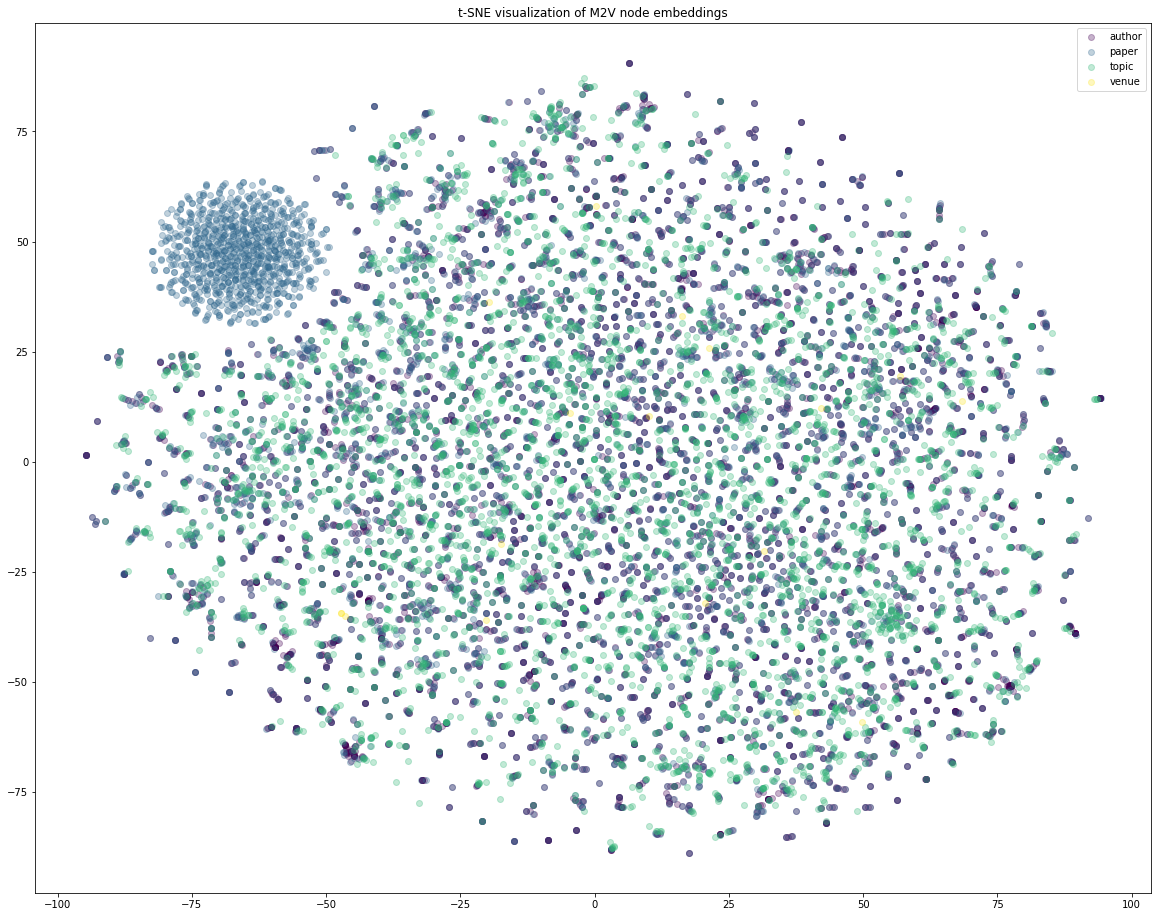

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Create a color map
unique_targets = np.unique(node_targets)
colors = plt.cm.get_cmap('viridis', len(unique_targets))  # You can choose different colormaps
label_map = {label: colors(i) for i, label in enumerate(unique_targets)}
node_colours = [label_map[target] for target in node_targets]

# Plotting
plt.figure(figsize=(20, 16))
for target in unique_targets:
    indices = [i for i, x in enumerate(node_targets) if x == target]
    plt.scatter(node_embeddings_2d[indices, 0], node_embeddings_2d[indices, 1], color=label_map[target], label=target, alpha=0.3)

plt.title("t-SNE visualization of M2V node embeddings".format(transform.__name__))
plt.legend()  # Add a legend
plt.show()

